In [1]:
!wget https://raw.githubusercontent.com/PAC2002/AIML-project-viscosity-of-crude-oil/main/Trainingdata.csv
!wget https://raw.githubusercontent.com/PAC2002/AIML-project-viscosity-of-crude-oil/main/TestData.csv

--2024-04-25 18:18:50--  https://raw.githubusercontent.com/PAC2002/AIML-project-viscosity-of-crude-oil/main/Trainingdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7173 (7.0K) [text/plain]
Saving to: ‘Trainingdata.csv’

Trainingdata.csv    100%[===================>]   7.00K  --.-KB/s    in 0s      

2024-04-25 18:18:50 (57.3 MB/s) - ‘Trainingdata.csv’ saved [7173/7173]

--2024-04-25 18:18:50--  https://raw.githubusercontent.com/PAC2002/AIML-project-viscosity-of-crude-oil/main/TestData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
training_df = pd.read_csv("/content/Trainingdata.csv")
test_df = pd.read_csv("/content/TestData.csv")
print("Training Dataset: \n", training_df.head())
print("\n Test dataset: \n", test_df.head())

Training Dataset: 
    No.  API at\n15°C   %C4   %C5   %C6   %C7+      MW  SGC7+  \
0    1          20.4  1.02  2.57  3.37  93.04  326.40   0.94   
1    2          20.0  0.04  0.44  1.62  97.90  331.22   0.93   
2    3          19.6  0.25  1.57  3.94  94.24  343.10   0.94   
3    4          19.5  0.00  0.12  1.16  98.72  295.70   0.94   
4    5          18.7  0.08  1.13  2.09  96.70  342.65   0.94   

   P (g/cc) at\n20°C  u (cP) at\n20°C  u (cP) at\n30°C  u (cP) at\n40°C  \
0              0.930           200.59           106.07           62.600   
1              0.933           243.11           131.90           76.875   
2              0.935           322.46           171.13           96.462   
3              0.935           312.40           158.25           88.722   
4              0.941           232.12           126.17           74.171   

   u (cP) at\n50°C  u (cP) at\n60 °C  
0           40.177            27.268  
1           48.461            32.351  
2           58.975         

Training Dataset Info: 

(82, 14)
missing value:  0


Text(0.5, 1.0, 'Training Dataset Plot')

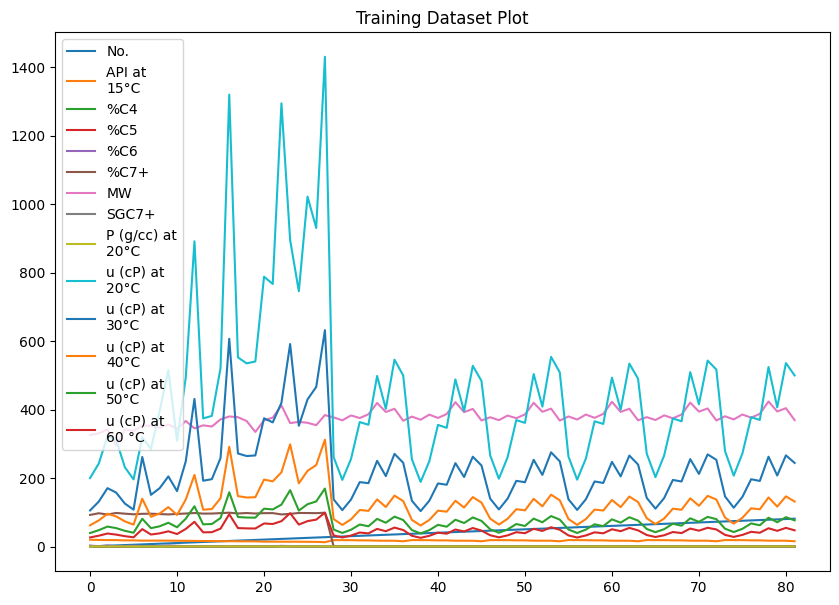

In [5]:
print("Training Dataset Info: \n")
print(training_df.shape)
print("missing value: ", training_df.isna().sum().sum())
training_df.plot(figsize=[10,7]);
plt.title("Training Dataset Plot")


Test Dataset Info: 

(9, 14)

 missing value:  0


Text(0.5, 1.0, 'Test dataset plot')

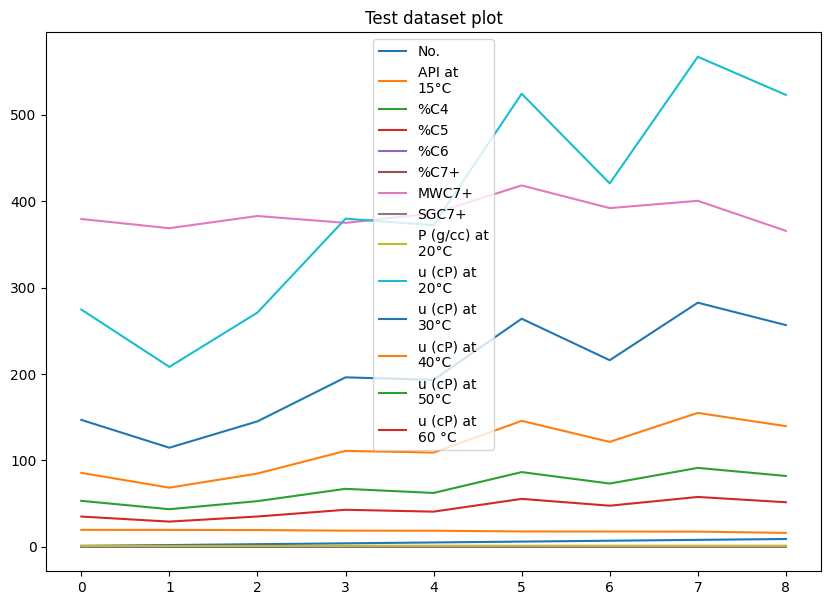

In [6]:
print("Test Dataset Info: \n")
print(test_df.shape)
print("\n missing value: ", test_df.isna().sum().sum())
test_df.plot(figsize=[10,7])
plt.title("Test dataset plot")

Data Preprocessing and Scaling

for Training Data: 



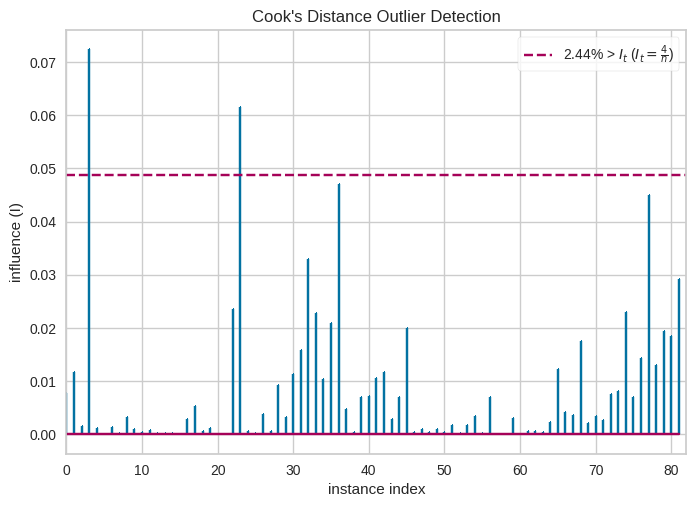

<Figure size 1000x500 with 0 Axes>

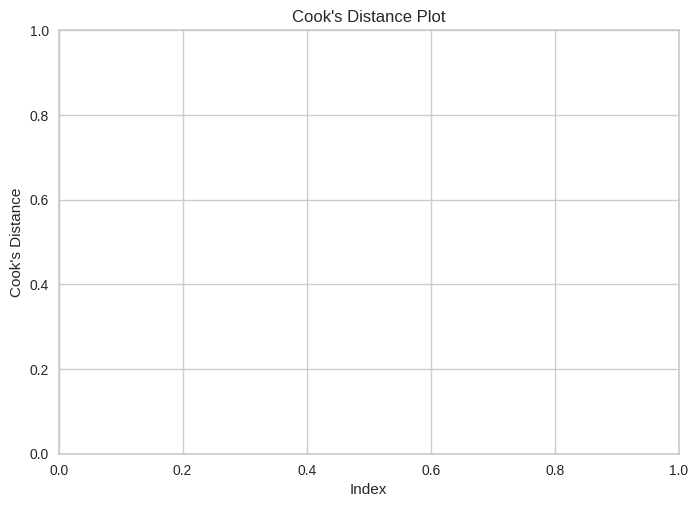

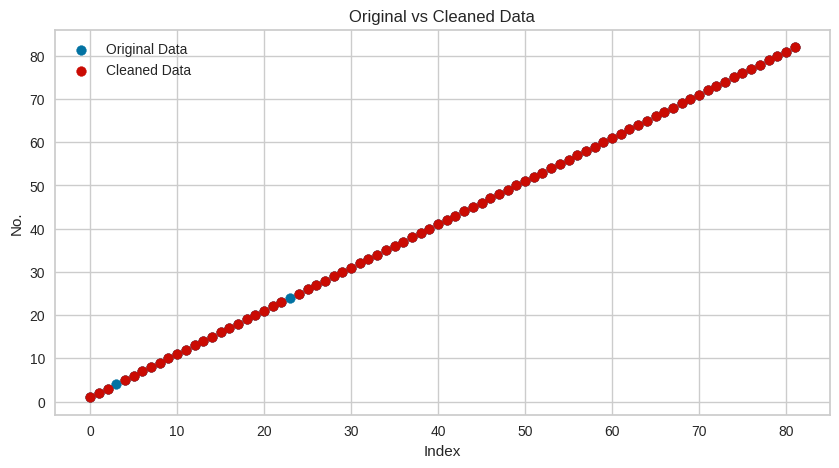

In [7]:
# outliers removal for the Training dataset
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import CooksDistance

print("for Training Data: \n")
X = training_df.iloc[:, 1:]
y = training_df.iloc[:, 0]
model = LinearRegression()
outlier_detector = CooksDistance()
outlier_detector.fit(X, y)


threshold = 4 / len(training_df)
outliers = np.where(outlier_detector.distance_ > threshold)[0]
cleaned_df = training_df.drop(outliers)

plt.figure(figsize=(10, 5))
outlier_detector.show(figsize=(10,5))
plt.title("Cook's Distance Plot")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.show()
print("\n")
plt.figure(figsize=(10, 5))
plt.scatter(training_df.index, training_df['No.'], color='b', label='Original Data')
plt.scatter(cleaned_df.index, cleaned_df['No.'], color='r', label='Cleaned Data')
plt.title('Original vs Cleaned Data')
plt.xlabel('Index')
plt.ylabel('No.')
plt.legend()
plt.show()

In [8]:
cleaned_df.head()

,No.,API at\n15°C,%C4,%C5,%C6,%C7+,MW,SGC7+,P (g/cc) at\n20°C,u (cP) at\n20°C,u (cP) at\n30°C,u (cP) at\n40°C,u (cP) at\n50°C,u (cP) at\n60 °C
0,1,20.4,1.02,2.57,3.37,93.04,326.40,0.94,0.930,200.59,106.07,62.600,40.177,27.268
1,2,20.0,0.04,0.44,1.62,97.90,331.22,0.93,0.933,243.11,131.90,76.875,48.461,32.351
2,3,19.6,0.25,1.57,3.94,94.24,343.10,0.94,0.935,322.46,171.13,96.462,58.975,38.663
4,5,18.7,0.08,1.13,2.09,96.70,342.65,0.94,0.941,232.12,126.17,74.171,46.590,30.978
5,6,18.6,0.35,1.62,3.21,94.81,338.41,0.95,0.941,196.73,108.36,64.539,41.088,27.617


for Test Data: 



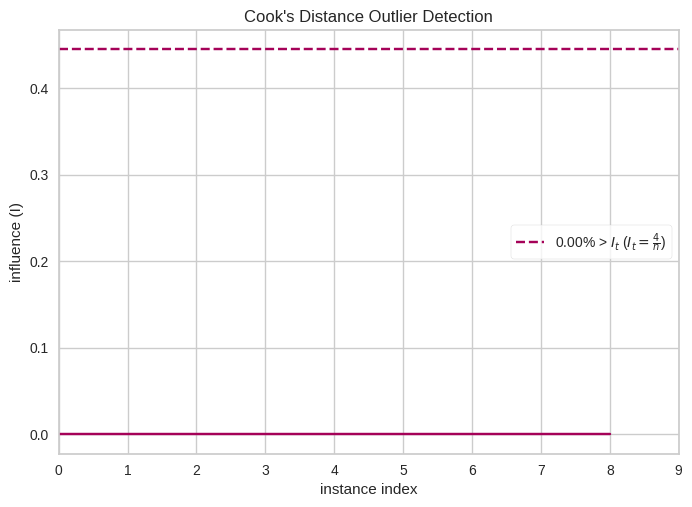

<Figure size 1000x500 with 0 Axes>

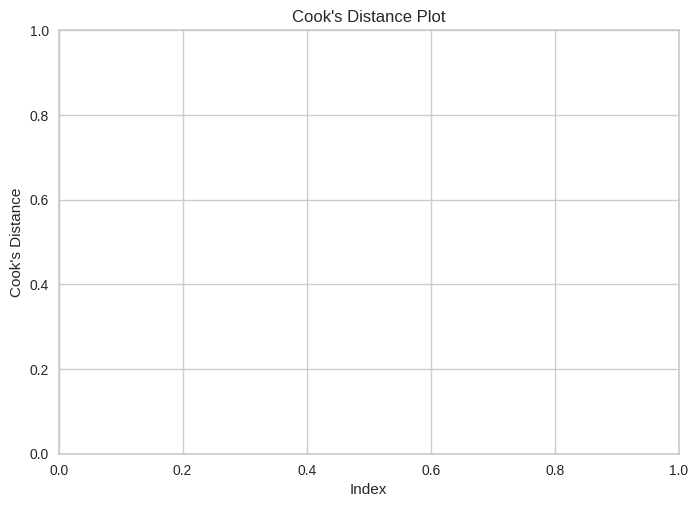

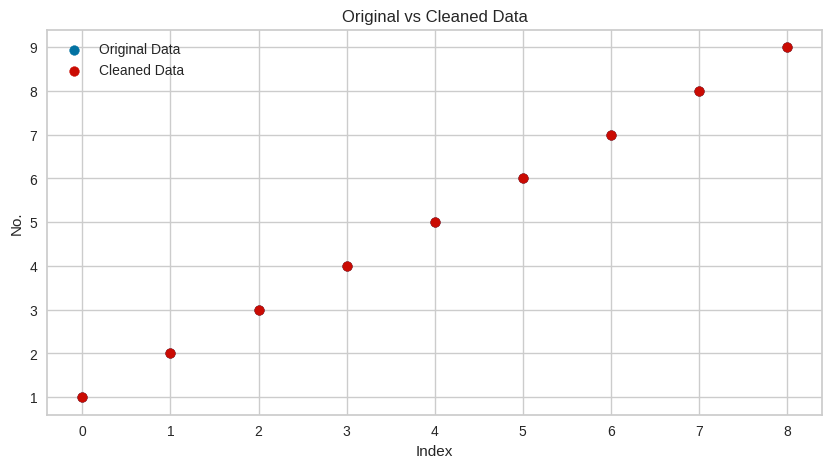

In [9]:
# outliers removal for the Test dataset
print("for Test Data: \n")
X = test_df.iloc[:, 1:]
y = test_df.iloc[:, 0]
model = LinearRegression()
outlier_detector = CooksDistance()
outlier_detector.fit(X, y)

threshold = 4 / len(test_df)
outliers = np.where(outlier_detector.distance_ > threshold)[0]
cleanedTest_df = test_df.drop(outliers)

plt.figure(figsize=(10, 5))
outlier_detector.show(figsize=(10,5))
plt.title("Cook's Distance Plot")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.show()
print("\n")
plt.figure(figsize=(10, 5))
plt.scatter(test_df.index, test_df['No.'], color='b', label='Original Data')
plt.scatter(cleanedTest_df.index, cleanedTest_df['No.'], color='r', label='Cleaned Data')
plt.title('Original vs Cleaned Data')
plt.xlabel('Index')
plt.ylabel('No.')
plt.legend()
plt.show()

In [10]:
cleanedTest_df.head()


,No.,API at\n15°C,%C4,%C5,%C6,%C7+,MWC7+,SGC7+,P (g/cc) at\n20°C,u (cP) at\n20°C,u (cP) at\n30°C,u (cP) at\n40°C,u (cP) at\n50°C,u (cP) at\n60 °C
0,1,19.58,0.006,0.028,0.034,0.932,379.385,0.942,0.933,274.58,146.84,85.538,53.158,34.972
1,2,19.53,0.009,0.036,0.040,0.915,368.718,0.938,0.928,208.19,114.65,68.410,43.491,29.153
2,3,19.34,0.010,0.042,0.042,0.906,382.840,0.947,0.936,271.07,145.17,84.792,52.823,35.038
3,4,18.67,0.007,0.034,0.032,0.927,374.896,0.948,0.939,379.76,196.12,110.990,67.072,42.829
4,5,18.57,0.012,0.032,0.033,0.923,385.901,0.948,0.939,372.14,193.18,109.030,62.307,40.673


Training of the models, the Decision Tree model and MLP model. Here we are not doing scaling as of now because of small dataset and for better understanding and interpretability of the output.

In [29]:

cleaned_df = pd.DataFrame(cleaned_df)
X_train = cleaned_df.iloc[:, 1:8]
y_train = cleaned_df.iloc[:, 9:]

X_test = cleanedTest_df.iloc[:, 1:8]
y_test = cleanedTest_df.iloc[:, 9:]
X_test = X_test.rename(columns={
    "MWC7+": "MW"
})
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (80, 7)
Shape of y_train:  (80, 5)
Shape of X_test:  (9, 7)
Shape of y_test:  (9, 5)


Optimized Decision Tree Model

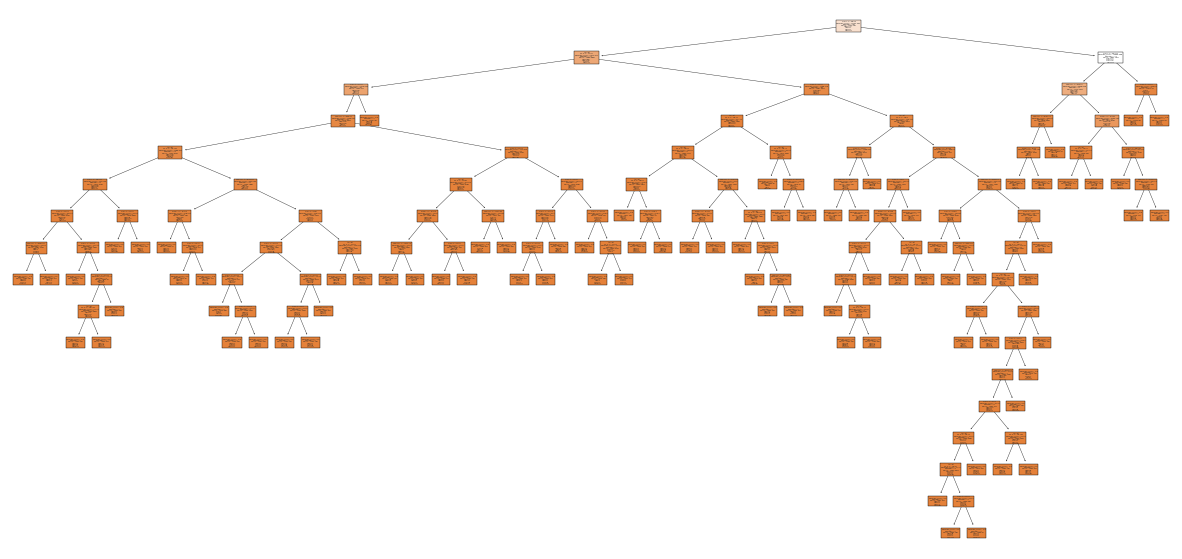

Root Mean Squared Error (RMSE): 16.297886549383414
Mean Absolute Error (MAE): 11.349911111111108




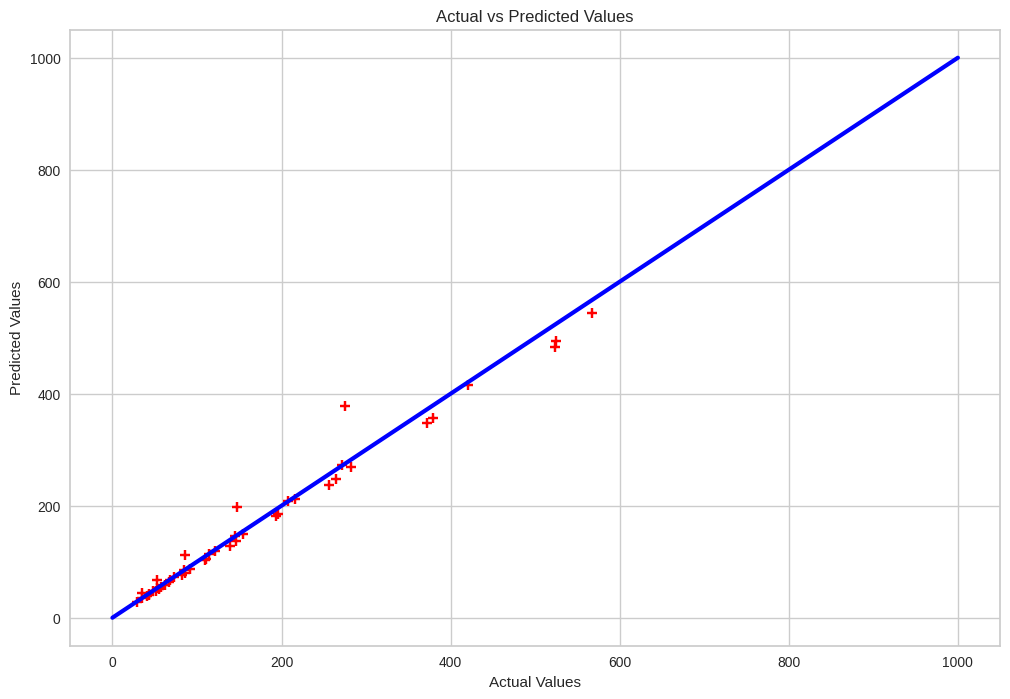

R^2 value : 0.8578009144959097



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
model = DecisionTreeRegressor(random_state=61)
model.fit(X_train, y_train)


plt.figure(figsize=(15,7))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

print("\n")
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='red',marker='+')
plt.plot([0, 1000], [0, 1000], color='blue', linewidth=3)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("R^2 value :", r2_score(y_test, y_pred))
print()

Optimized MLP model

Root Mean Squared Error (RMSE): 18.631523849997254
Mean Absolute Error (MAE): 14.678360769751114




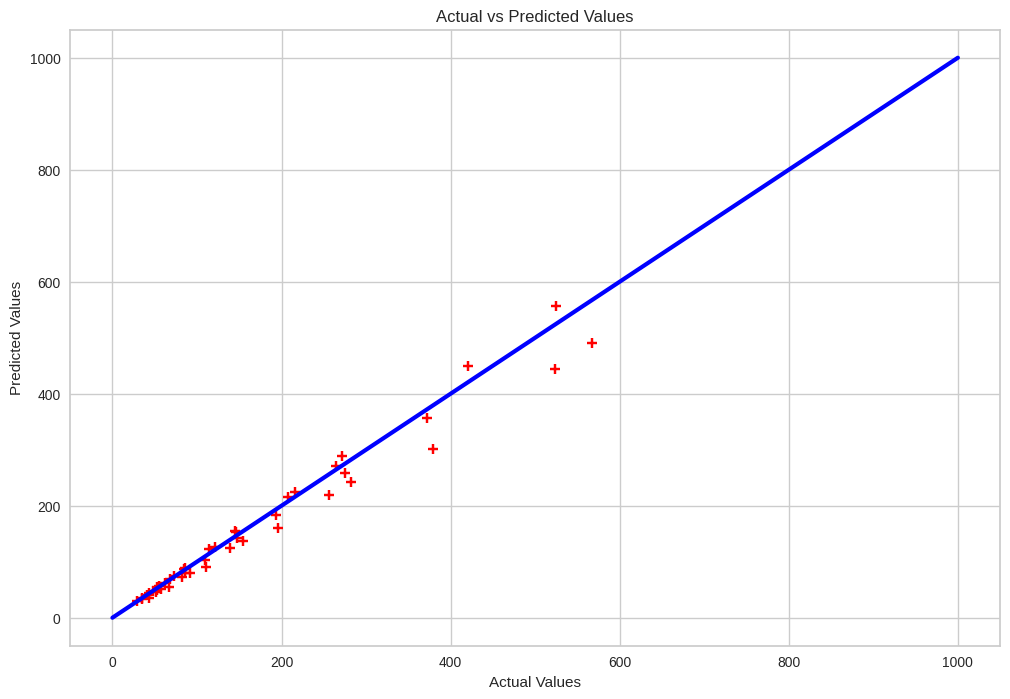

R^2 value : 0.8283416348200558
Number of hidden layer 2


In [31]:

from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(150,40), activation='relu', solver='adam', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

print("\n")
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='red',marker='+')
plt.plot([0, 1000], [0, 1000], color='blue', linewidth=3)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("R^2 value :", r2_score(y_test, y_pred))
print("Number of hidden layer", len(model.hidden_layer_sizes))

So DT model is having better fit and generalization as compared to the MLP model. So we are considering the DT model for further consideration. Although for greater dataset and after optimizing properly, the mlp model can be better fit. But still for the dataset for this project is giving the DT model more prior.

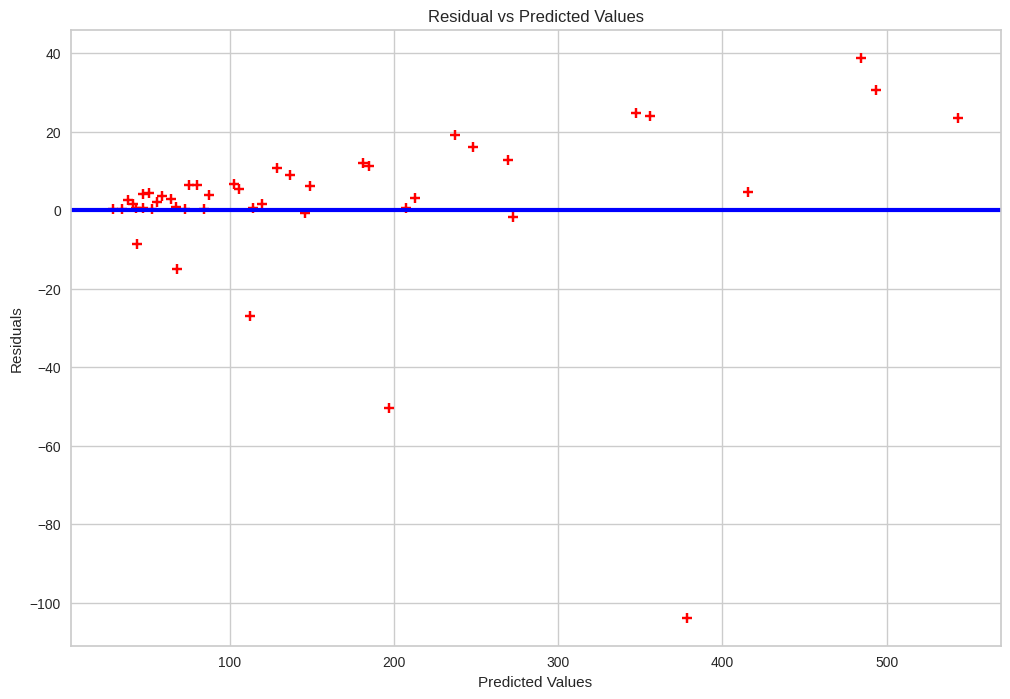

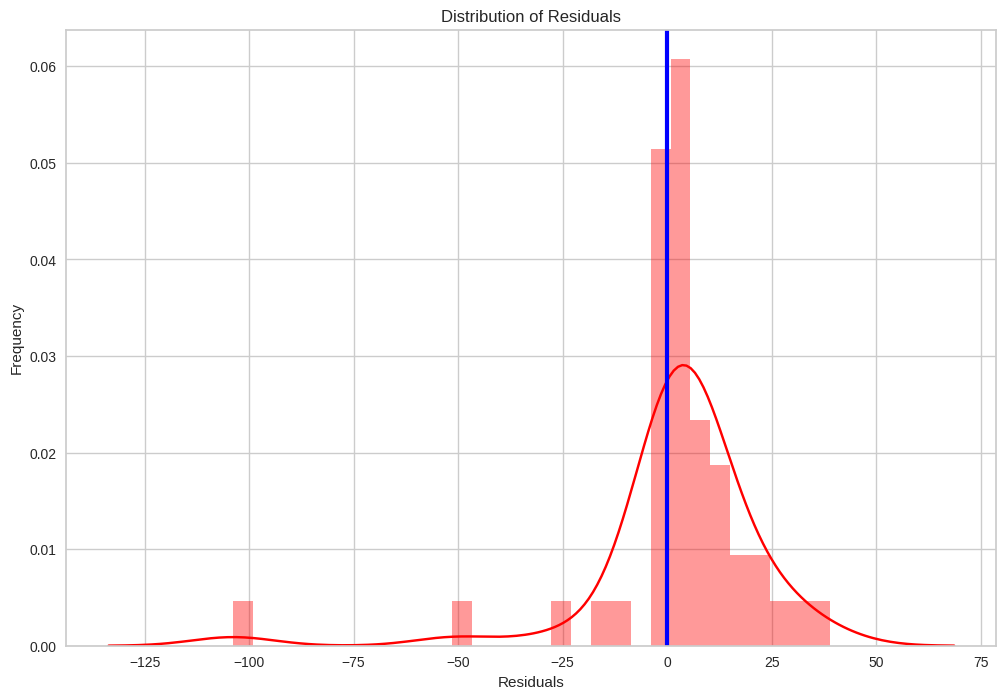

In [36]:
import seaborn as sns
model = DecisionTreeRegressor(random_state=61)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Residual vs Predicted Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, color='red',marker='+')
plt.axhline(y=0, color='blue', linewidth=3)
plt.title('Residual vs Predicted Values for the DT model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
print("\n")
# Distribution Plot
plt.figure(figsize=(12, 8))
sns.distplot(residuals, color='red')
plt.axvline(x=0, color='blue', linewidth=3)
plt.title('Distribution of Residuals for the DT model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
